<a href="https://colab.research.google.com/github/ryo00427/data_analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [70]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%precision 3

'%.3f'

In [71]:
df = pd.read_csv('/content/drive/MyDrive/baseboll_data/Team_Batting_Statistics.csv')
df.head()

,チーム,打 率,試 合,打 席,打 数,得 点,安 打,二塁打,三塁打,本塁打,...,盗塁刺,犠 打,犠 飛,四 球,故意四,死 球,三 振,併殺打,長打率,出塁率
0,DeNA,0.256,143,5393,4863,522,1246,243,15,101,...,27,85,31,360,38,54,922,114,0.375,0.313
1,巨 人,0.247,143,5350,4752,462,1172,211,16,81,...,25,125,28,409,37,36,972,89,0.349,0.309
2,中 日,0.243,143,5277,4796,373,1166,178,18,68,...,27,113,21,322,24,25,1046,106,0.330,0.293
3,ヤクルト,0.243,143,5343,4696,506,1141,171,8,103,...,16,137,32,436,31,42,1042,96,0.349,0.311
4,阪 神,0.242,143,5335,4694,485,1137,164,17,67,...,35,115,26,441,20,59,1028,120,0.327,0.314


In [80]:
df.columns = df.columns.str.replace('　', '')

In [81]:
df['チーム'] = df['チーム'].map({'巨人': 0, '阪神': 1, '広島': 2, '中日': 3, 'DeNA': 4, 'ヤクルト': 5})

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   チーム     2 non-null      float64
 1   打率      6 non-null      float64
 2   試合      6 non-null      int64  
 3   打席      6 non-null      int64  
 4   打数      6 non-null      int64  
 5   得点      6 non-null      int64  
 6   安打      6 non-null      int64  
 7   二塁打     6 non-null      int64  
 8   三塁打     6 non-null      int64  
 9   本塁打     6 non-null      int64  
 10  塁打      6 non-null      int64  
 11  打点      6 non-null      int64  
 12  盗塁      6 non-null      int64  
 13  盗塁刺     6 non-null      int64  
 14  犠打      6 non-null      int64  
 15  犠飛      6 non-null      int64  
 16  四球      6 non-null      int64  
 17  故意四     6 non-null      int64  
 18  死球      6 non-null      int64  
 19  三振      6 non-null      int64  
 20  併殺打     6 non-null      int64  
 21  長打率     6 non-null      float64
 22  出塁率   

     チーム        打率  試合        打席        打数        得点        安打       二塁打  \
チーム  1.0 -1.000000 NaN -1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
打率  -1.0  1.000000 NaN  0.800487  0.802575  0.573904  0.971642  0.951342   
試合   NaN       NaN NaN       NaN       NaN       NaN       NaN       NaN   
打席  -1.0  0.800487 NaN  1.000000  0.341594  0.772894  0.654865  0.638480   
打数  -1.0  0.802575 NaN  0.341594  1.000000  0.019908  0.919486  0.833365   
得点  -1.0  0.573904 NaN  0.772894  0.019908  1.000000  0.395468  0.434026   
安打  -1.0  0.971642 NaN  0.654865  0.919486  0.395468  1.000000  0.948941   
二塁打 -1.0  0.951342 NaN  0.638480  0.833365  0.434026  0.948941  1.000000   
三塁打 -1.0 -0.193237 NaN -0.521650  0.218158 -0.636245 -0.038477 -0.037119   
本塁打  1.0  0.709668 NaN  0.829886  0.318300  0.753057  0.587776  0.568521   
塁打  -1.0  0.972950 NaN  0.811396  0.746133  0.612312  0.929922  0.914736   
打点  -1.0  0.619469 NaN  0.816057  0.066618  0.996519  0.442775  0.474566   
盗塁  -1.0  0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22593 (\N{CJK UNIFIED IDEOGRAPH-5841}) missing from font(s) DejaVu Sans.
  fig.canvas

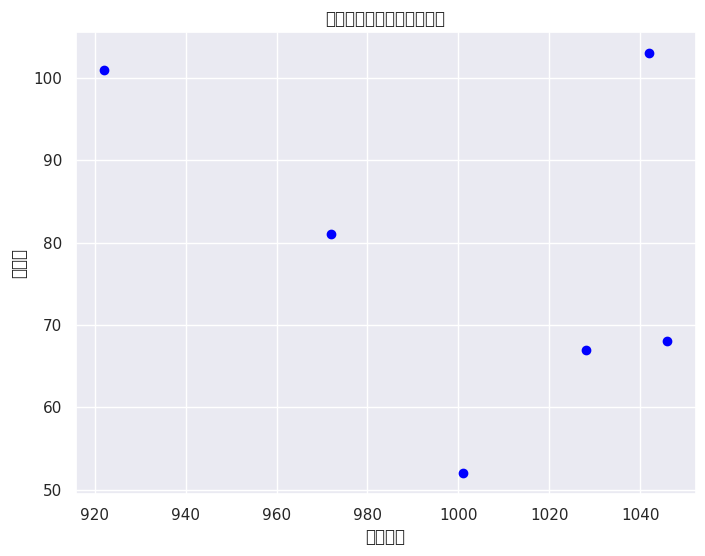

In [96]:
correlation = df.corr()
print(correlation)

# 散布図を作成
plt.figure(figsize=(8, 6))
plt.scatter(df['三振'], df['本塁打'], color='blue')
plt.title('本塁打数と三振数の散布図')
plt.xlabel('本塁打数')
plt.ylabel('三振数')

# グラフを表示
plt.grid(True)
plt.show()